<a href="https://colab.research.google.com/github/aritro66/Gold-Price-Prediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

Collecting and Processing Data

In [3]:
# Loading the dataset using Pandas function
goldprice_data = pd.read_csv('/content/gld_price_data.csv')

In [10]:
# Checking data of first 5 rows
goldprice_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
# Checking data of last 5 rows
goldprice_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# No. of rows and columns
goldprice_data.shape

(2290, 6)

In [13]:
# Analysing data
goldprice_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
# Getting basic information about data
goldprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
# Finding missing values
goldprice_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

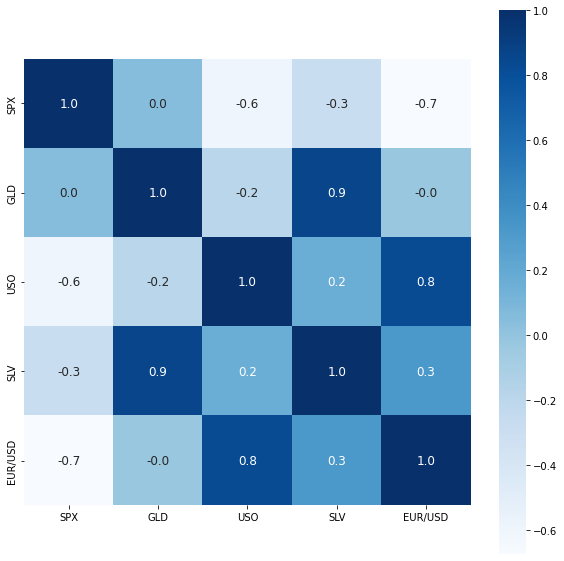

In [17]:
# constructing a heatmap to understand correlation
correlation = goldprice_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

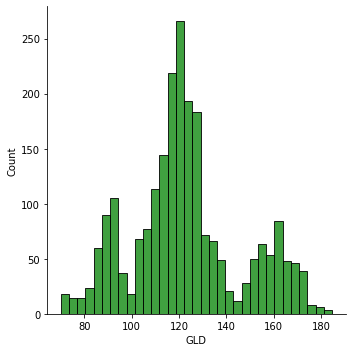

In [19]:
# Checking the distribution of the Gold Price
sns.displot(goldprice_data['GLD'],color='green')

In [20]:
# Separating data and labels
X = goldprice_data.drop(columns=['GLD','Date'],axis=1)
Y = goldprice_data['GLD']
print(X.shape)
print(Y.shape)

(2290, 4)
(2290,)


Training and Testing data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

Modal Training using Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)

RandomForestRegressor()

Modal Evalution

In [24]:
# R squared error and mean absolute error of Training Data
train_prediction = regressor.predict(X_train)
print('R squared error ',r2_score(y_train,train_prediction))
print('Mean absolute error ',mean_absolute_error(y_train,train_prediction))

R squared error  0.9983462033785758
Mean absolute error  0.49266900623908366


In [25]:
# R squared error and mean absolute error of Testing Data
test_prediction = regressor.predict(X_test)
print('R squared error ',r2_score(y_test,test_prediction))
print('Mean absolute error ',mean_absolute_error(y_test,test_prediction))

R squared error  0.9909102196886594
Mean absolute error  1.219333966812226


Compare the Actual Values and Predicted Values in a Plot

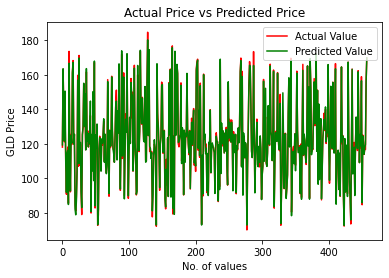

In [29]:
y_test=list(y_test)
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()